### Comparación Estadística de los resultados de dos modelos supervisados

Autor: Daniel Requena Moreno daniel.requena@proton.me

In [15]:
import scipy.stats as stats

# Datos de rendimiento (porcentajes de acierto) para los clasificadores
resultados_j48 = [94.1901, 92.9577, 92.2535, 92.6056, 94.5423]
resultados_nb = [92.6056, 92.6056, 92.4296 , 93.1338, 92.6056]

# Realizar el t-test pareado
t_stat, p_value = stats.ttest_rel(resultados_j48, resultados_nb)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretación
if p_value < 0.05:
    print("Diferencia estadísticamente significativa entre los clasificadores (p < 0.05).")
else:
    print("No hay diferencia estadísticamente significativa entre los clasificadores (p >= 0.05).")

t-statistic: 1.3092532387953255
p-value: 0.2605911829548277
No hay diferencia estadísticamente significativa entre los clasificadores (p >= 0.05).


In [5]:
from scipy.stats import ttest_rel

# t-test pareado
stat, p_value = ttest_rel(resultados_j48, resultados_nb)
print(f"t-test pareado: estadístico t={stat:.4f}, p-valor={p_value:.4f}")

if p_value < 0.05:
    print(f"Diferencias estadísticamente significativas entre los clasificadores: {p_value}")
else:
    print(f"No hay diferencias estadísticamente significativas: {p_value}")

t-test pareado: estadístico t=1.3093, p-valor=0.2606
No hay diferencias estadísticamente significativas: 0.2605911829548277


In [17]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk
_, p1 = shapiro(resultados_j48)
_, p2 = shapiro(resultados_nb)

print(f"P-valor clasificador 1: {p1:.4f}")
print(f"P-valor clasificador 2: {p2:.4f}")

if p1 > 0.05 and p2 > 0.05:
    print("Ambos conjuntos de datos siguen una distribución normal.")
else:
    print("Al menos uno de los conjuntos de datos no sigue una distribución normal.")

P-valor clasificador 1: 0.4061
P-valor clasificador 2: 0.0435
Al menos uno de los conjuntos de datos no sigue una distribución normal.


In [18]:
from scipy.stats import wilcoxon

# Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(resultados_j48, resultados_nb)
print(f"Wilcoxon test: estadístico={stat:.4f}, p-valor={p_value:.4f}")

if p_value < 0.05:
    print(f"Diferencias estadísticamente significativas entre los clasificadores. {p_value}")
else:
    print(f"No hay diferencias estadísticamente significativas. {p_value}")

Wilcoxon test: estadístico=4.0000, p-valor=0.4375
No hay diferencias estadísticamente significativas. 0.4375


## Ejemplos artificiales

### Ejemplo práctico: Generar y visualizar la hipótesis nula

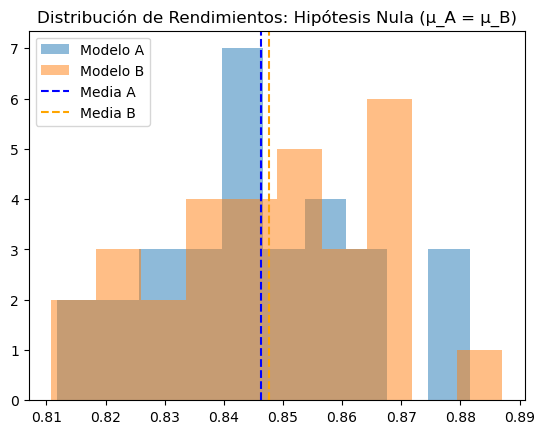

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos simulados para dos modelos
np.random.seed(42)
modelo_A = np.random.normal(0.85, 0.02, 30)  # Media: 0.85, Desv. Est.: 0.02
modelo_B = np.random.normal(0.85, 0.02, 30)  # Media: 0.85, Desv. Est.: 0.02

# Visualización
plt.hist(modelo_A, bins=10, alpha=0.5, label='Modelo A')
plt.hist(modelo_B, bins=10, alpha=0.5, label='Modelo B')
plt.axvline(np.mean(modelo_A), color='blue', linestyle='--', label='Media A')
plt.axvline(np.mean(modelo_B), color='orange', linestyle='--', label='Media B')
plt.title("Distribución de Rendimientos: Hipótesis Nula (\u03BC_A = \u03BC_B)")
plt.legend()
plt.show()

### Ejemplo práctico: Calcular el p-valor

In [10]:
from scipy.stats import ttest_ind

# Comparación estadística
stat, p_value = ttest_ind(modelo_A, modelo_B)
print(f"Estadístico t={stat:.4f}, p-valor={p_value:.4f}")

# Decisión
if p_value <= 0.05:
    print("Rechazamos H0: hay diferencias significativas.")
else:
    print("No se puede rechazar H0: no hay diferencias significativas.")

Estadístico t=-0.2833, p-valor=0.7779
No se puede rechazar H0: no hay diferencias significativas.


### Ejemplo práctico: Evaluar normalidad

In [11]:
from scipy.stats import shapiro

# Verificación de normalidad
_, p_value_A = shapiro(modelo_A)
_, p_value_B = shapiro(modelo_B)
print(f"Modelo A: p-valor normalidad = {p_value_A:.4f}")
print(f"Modelo B: p-valor normalidad = {p_value_B:.4f}")

Modelo A: p-valor normalidad = 0.6868
Modelo B: p-valor normalidad = 0.9130


### Ejemplo práctico (Python): Comparación con Wilcoxon

In [13]:
from scipy.stats import wilcoxon

# Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(modelo_A, modelo_B)
print(f"Wilcoxon: estadístico={stat:.4f}, p-valor={p_value:.4f}")

Wilcoxon: estadístico=209.0000, p-valor=0.6408


### Ejemplo práctico: t-test no pareado

In [14]:
from scipy.stats import ttest_ind

# Comparación de dos grupos independientes
grupo_1 = np.random.normal(0.82, 0.03, 30)  # Modelo entrenado en Dataset 1
grupo_2 = np.random.normal(0.85, 0.02, 30)  # Modelo entrenado en Dataset 2

# t-test no pareado
stat, p_value = ttest_ind(grupo_1, grupo_2, equal_var=True)
print(f"t-test no pareado: estadístico={stat:.4f}, p-valor={p_value:.4f}")

t-test no pareado: estadístico=-4.5878, p-valor=0.0000
